# Gingerbread Fourier series
### Ola Persson
### November 2019

## Gingerbread Fourier series

- A typical Swedish gingerbread
- Equations for hearts
- Shape selection
- Shapes with complex numbers
- Fourier series of a shape
- Frequency contents
- Compression
- Conclusions
- Want to learn more?

## A typical Swedish gingerbread

- Flavoured with Butter, Ginger, Cloves, Cinnamon & Molasses

<img src="gingerbread.JPG" alt="Drawing" style="width: 300px;"/>
     

## Equations for hearts

* Internet contains a lot of equations for heart shapes
* We will be using parametric representation of the functions
* We start with circle and modify that to heart shapes
* We also try another shape

In [26]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 5]

nr_points=1024
t=np.linspace(0,2*np.pi,nr_points)

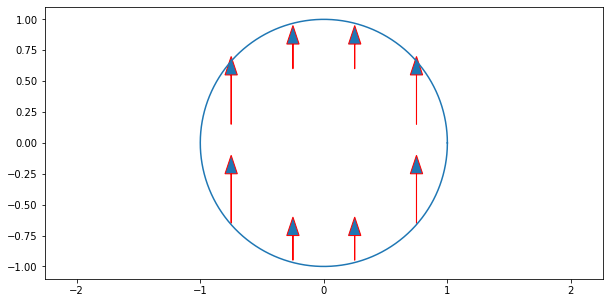

In [27]:
def arrow(x,y,width, height):
    plt.arrow(x,y,width,height,ec="red",head_width=0.1)

x=np.cos(t)
y=np.sin(t)
plt.axis("equal")
plt.plot(x,y)
arrow(0.25,-0.95,0,0.2)
arrow(0.75,-0.65,0,0.4)
arrow(0.25,0.6,0,0.2)
arrow(0.75,0.15,0,0.4)
arrow(-0.25,-0.95,0,0.2)
arrow(-0.75,-0.65,0,0.4)
arrow(-0.25,0.6,0,0.2)
arrow(-0.75,0.15,0,0.4)
plt.show()

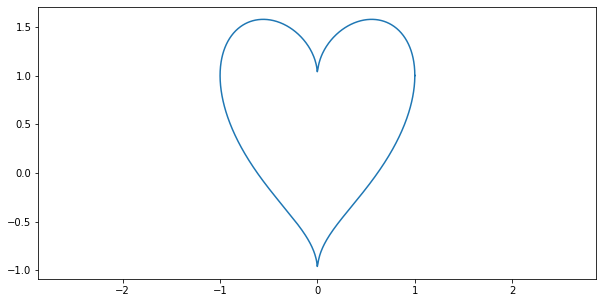

In [28]:
#Proposal from Stackexchange

x1=np.cos(t)
y1=np.sin(t)+np.sqrt(abs(x1))
plt.axis("equal")
plt.plot(x1,y1)
plt.show()

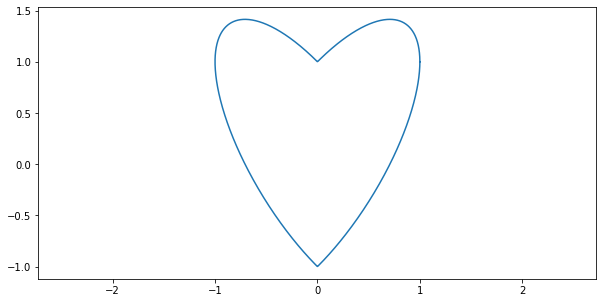

In [29]:
#Modified version of example above 

x2=np.cos(t)
y2=np.sin(t)+abs(x2)
plt.axis("equal")
plt.plot(x2,y2)
plt.show()

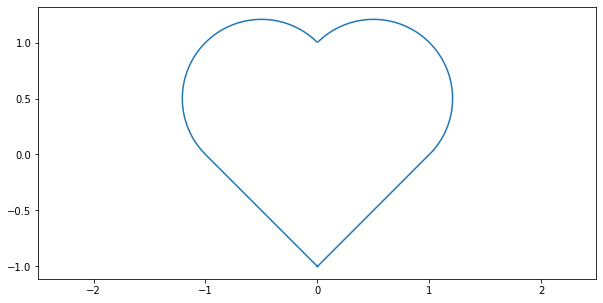

In [30]:
#Two orthogonal lines combined with two half circles.
x3=np.zeros(nr_points)
y3=np.zeros(nr_points)
split=round(nr_points/4)

#Build a line
for i in range(0,split):
    x3[i]=i*1.0/split
    y3[i]=-1.0+i*1.0/split

#Build half circle turned pi/4 with radius 1/sqrt(2)
for i in range(0,split):
    x3[i+split]=1-1/2+np.cos(np.pi*i/split-np.pi/4)/np.sqrt(2)
    y3[i+split]=1/2+np.sin(np.pi*i/split-np.pi/4)/np.sqrt(2)

#Mirror the image    
for i in range(2*split,4*split):
    x3[i]=-x3[4*split-i-1]
    y3[i]=y3[4*split-i-1]

plt.axis("equal")
plt.plot(x3,y3)
plt.show()

## Shape selection


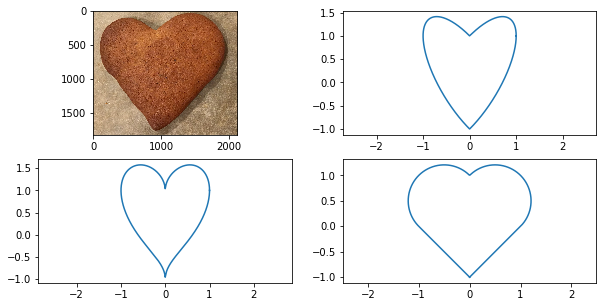

In [31]:
import matplotlib.image as mpimg
img=mpimg.imread("gingerbread.jpg")

fig, axs = plt.subplots(2,2)

axs[0,0].imshow(img)
axs[1,0].axis("equal")
axs[1,0].plot(x1,y1)
axs[0,1].axis("equal")
axs[0,1].plot(x2,y2)
axs[1,1].axis("equal")
axs[1,1].plot(x3,y3)
plt.show()

## Shapes with complex numbers

* Shapes can be described as an array of complex numbers
* You use the x-values as the real part and the y-values as the imaginary part of the complex number
* We will define an array of complex numbers representing the points on the shape
* Finally we will plot it

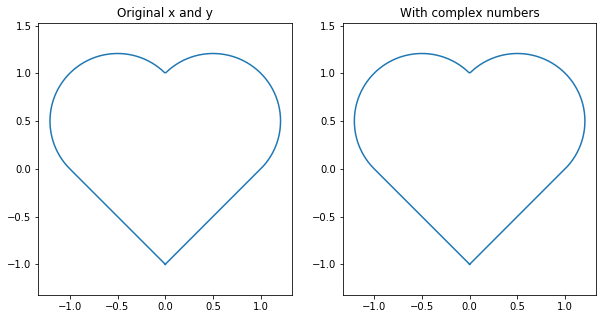

In [41]:
#Complex numbers is very easy to use in Python
heart_complex=x3+1j*y3

fig, axs = plt.subplots(1,2)
axs[0].axis("equal")
axs[0].plot(x3,y3)
axs[0].title.set_text("Original x and y")
axs[1].axis("equal")
axs[1].plot(np.real(heart_complex),np.imag(heart_complex))
axs[1].title.set_text("With complex numbers")
plt.show()

## Fourier series of a shape
* The complex numbers in the array is used to create the corresponding Fourier series
* In this case we use FFT, Fast Fourier Transform, to calculate the Fourier series and its inverse (back to a shape).
* We plot again to confirm the transform and inverse is identical to the orginal

In [42]:
fft=np.fft.fft(heart_complex)
#By default FFT generates as many frequencies as was in the input
#fft[0] contains zero frequency, this is actually the centerpoint
#fft[1] and fft[n-1] contain most significant positive and negative frequency
#And so on

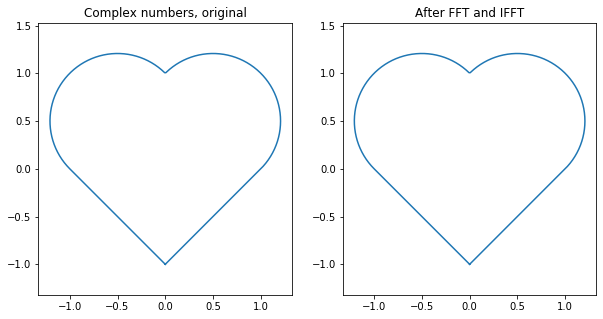

In [43]:
ifft=np.fft.ifft(fft)

fig, axs = plt.subplots(1,2)
axs[0].axis("equal")
axs[0].plot(np.real(heart_complex),np.imag(heart_complex))
axs[0].title.set_text("Complex numbers, original")
axs[1].axis("equal")
axs[1].plot(np.real(ifft),np.imag(ifft))
axs[1].title.set_text("After FFT and IFFT")
plt.show()

## Frequency contents in heart shape
* The diagram below shows the amplitudes for the different frequencies
* At 0(from left) you see the mean value or the centerpoint
* At 1(from left) you see the amplitude of the lowest positive frequency
* At the right most position you see the amplitude of the lowest negative frequency

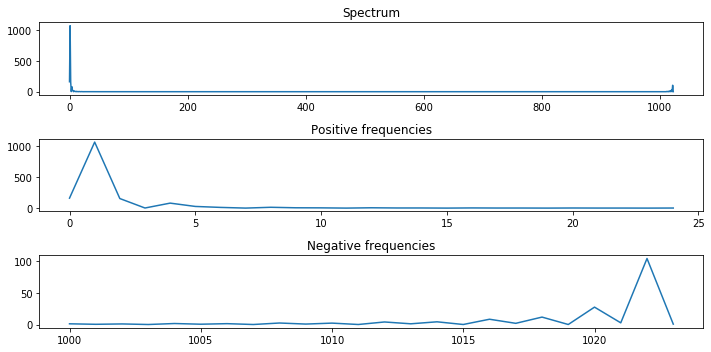

In [45]:
fftabs=np.abs(fft)

fig, axs = plt.subplots(3,1)
axs[0].plot(fftabs)
axs[0].title.set_text("Spectrum")
axs[1].plot(fftabs[0:25])
axs[1].title.set_text("Positive frequencies")
axs[2].plot(range(1000,1024),fftabs[1000:1024])
axs[2].title.set_text("Negative frequencies")
plt.tight_layout()
plt.show()

## Compression
* By reviewing the diagram above you see that almost all amplitudes in the middle of the diagram is close to zero
* Lets investigate what happens when we exclude those from the data

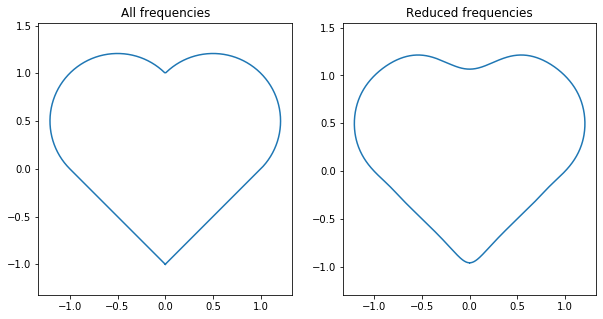

In [46]:
#Retain copy of original data, Python copy by reference
fft_reduced=fft.copy()
#Lets keep the centerpoint and the ten most significant frequencies (positive and negative)
#Set all other values to 0
keep=10
for i in range(keep,nr_points-keep):
    fft_reduced[i]=0
ifft_reduced10=np.fft.ifft(fft_reduced)

fig, axs = plt.subplots(1,2)
axs[0].axis("equal")
axs[0].plot(np.real(heart_complex),np.imag(heart_complex))
axs[0].title.set_text("All frequencies")
axs[1].axis("equal")
axs[1].plot(np.real(ifft_reduced10),np.imag(ifft_reduced10))
axs[1].title.set_text("Reduced frequencies")
plt.show()

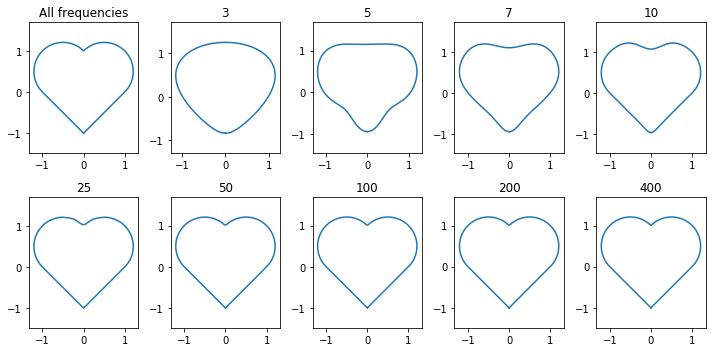

In [47]:
#Retain copy of original data, Python copy by reference
fft_reduced=fft.copy()
#Lets keep the centerpoint and the most significant frequencies (positive and negative)
#First item means keep centerpoint and the 3 most significant frequencies (positive and negative)

keep_list=[3,5,7,10,25,50,100,200,400]
ifft_reduced=np.zeros(len(keep_list),dtype=type(fft_reduced))

for j in range(len(keep_list)-1,-1,-1):
    keep=keep_list[j]
    for i in range(keep,nr_points-keep):
        fft_reduced[i]=0
    ifft_reduced[j]=np.fft.ifft(fft_reduced)

fig, axs = plt.subplots(2,5)

axs[0,0].axis("equal")
axs[0,0].plot(np.real(heart_complex),np.imag(heart_complex))
axs[0,0].title.set_text("All frequencies")
for i in range(0,4):
    axs[0,i+1].axis("equal")
    axs[0,i+1].plot(np.real(ifft_reduced[i]),np.imag(ifft_reduced[i]))
    axs[0,i+1].title.set_text(str(keep_list[i]))
for i in range(0,5):
    axs[1,i].axis("equal")
    axs[1,i].plot(np.real(ifft_reduced[i+4]),np.imag(ifft_reduced[i+4]))
    axs[1,i].title.set_text(str(keep_list[i+4]))
plt.tight_layout()
plt.show()

## Conclusions
- You can represent shapes in the plane with an array of complex numbers
- The array of complex numbers can be transformed with FFT to a Fourier serie
- Reviewing the frequency contents proved significant room for compression
- In this case it was possible to reduce 1024 complex numbers from the original shape down to 21 and still recognize the gingerbread

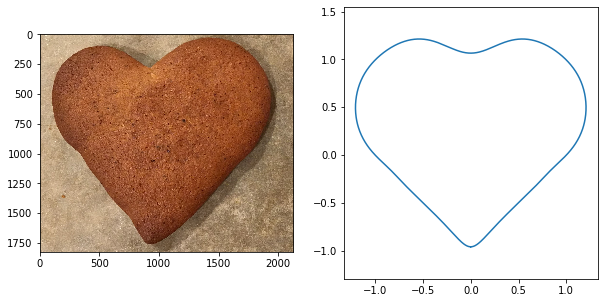

In [48]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(img)
axs[1].axis("equal")
axs[1].plot(np.real(ifft_reduced10),np.imag(ifft_reduced10))
plt.show()

## Want to learn more?

- Watch Mathologer and 3Blue1Brown episodes on Fourier Series on Youtube. Truely amazing